In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

In [77]:
path = r"C:\Users\ASUS\Desktop\ML\e_commerce\E_Commerce.csv"
df = pd.read_csv(path)
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
df.shape

(10999, 12)

In [7]:
df.drop(['ID'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Text(0.5, 1.0, 'Gender Distribution')

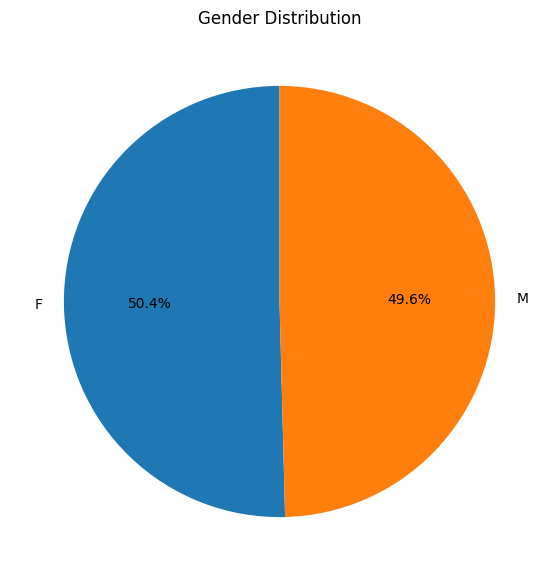

In [16]:
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23976\2399961302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_importance', data=df, ax=ax[1], palette='Set1').set_title('Product Importance')


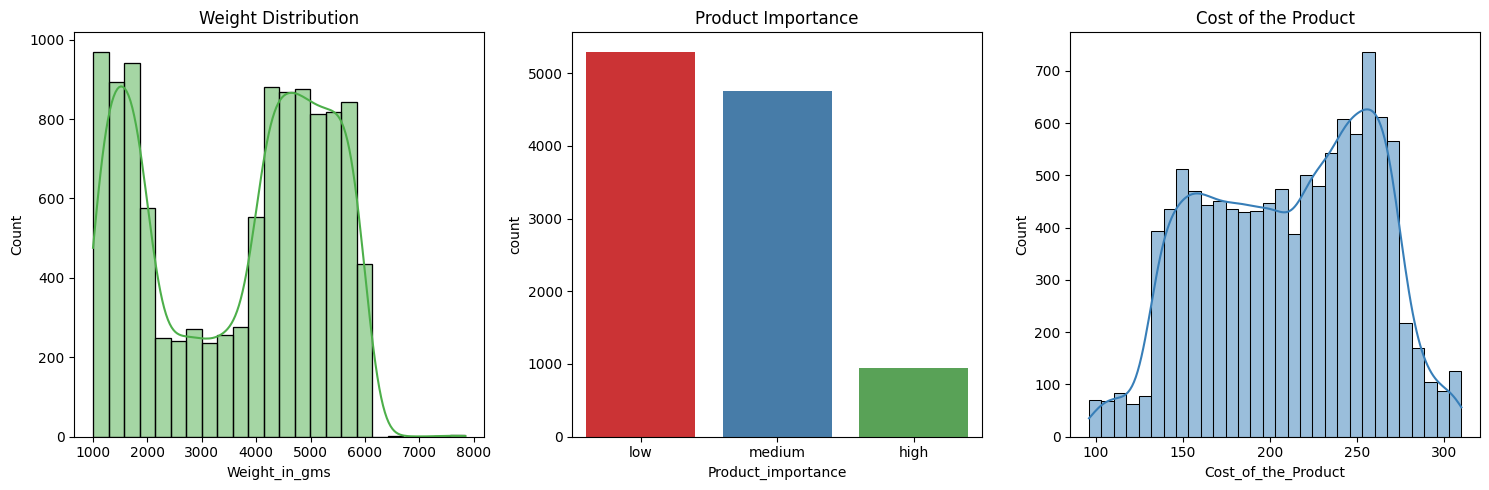

In [34]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True, color=sns.color_palette('Set1')[2]).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], palette='Set1').set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True, color=sns.color_palette('Set1')[1]).set_title('Cost of the Product')

plt.tight_layout()
plt.show()

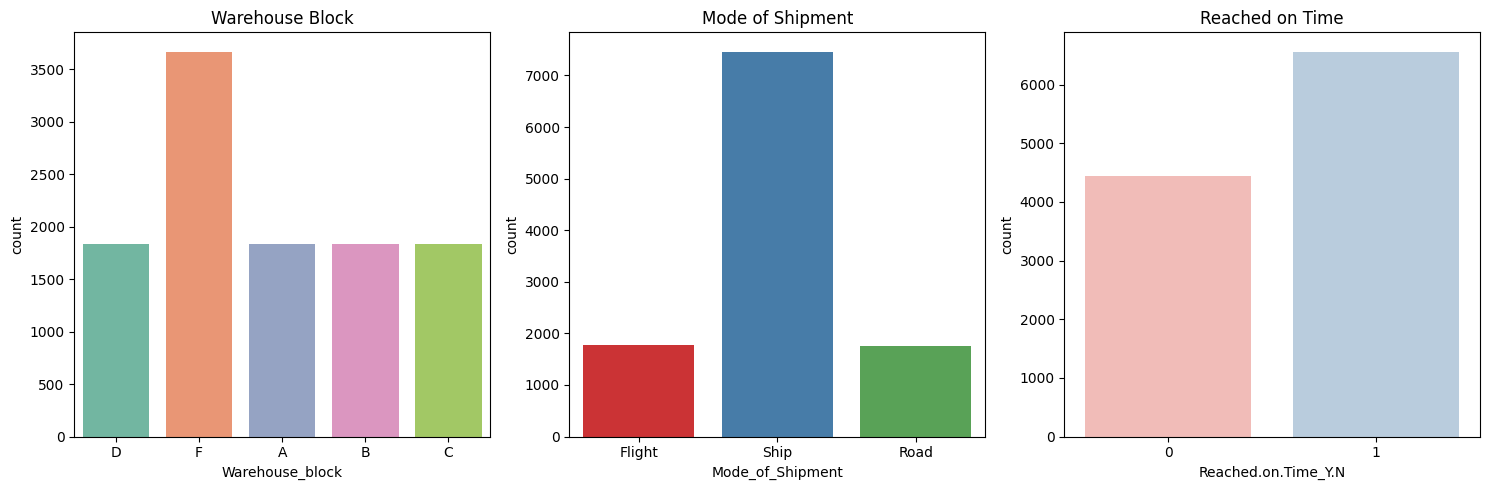

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Warehouse_block', data=df, ax=ax[0], hue='Warehouse_block', palette='Set2', legend=False).set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1], hue='Mode_of_Shipment', palette='Set1', legend=False).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=ax[2], hue='Reached.on.Time_Y.N', palette='Pastel1', legend=False).set_title('Reached on Time')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Discount Offered')

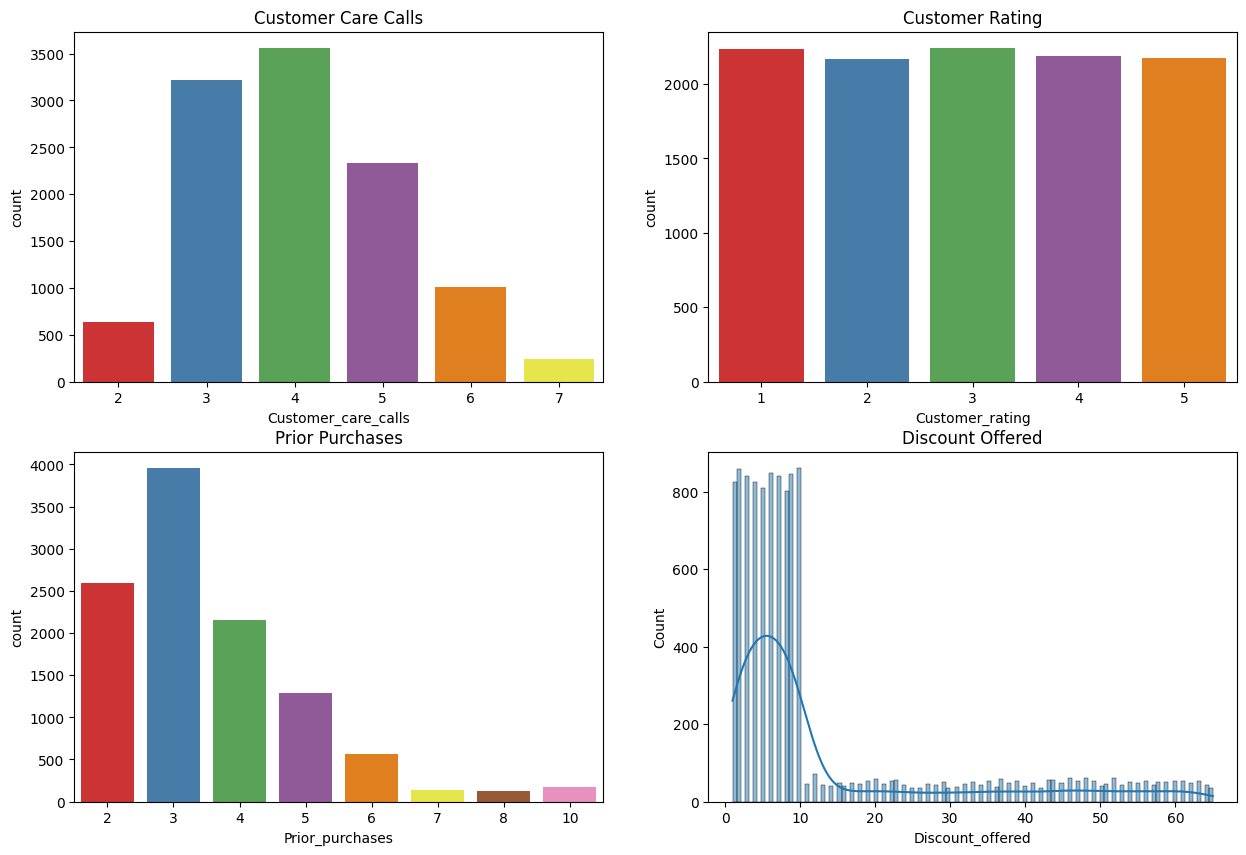

In [25]:

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue='Customer_care_calls', palette='Set1', legend=False).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1], hue='Customer_rating', palette='Set1', legend=False).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0], hue='Prior_purchases', palette='Set1', legend=False).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Text(0.5, 1.0, 'Gender vs Reached on Time')

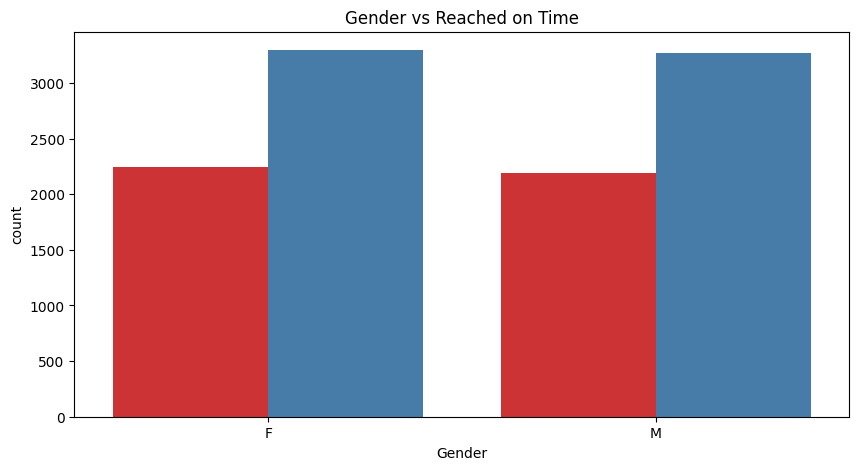

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N', palette='Set1', legend=False).set_title('Gender vs Reached on Time')

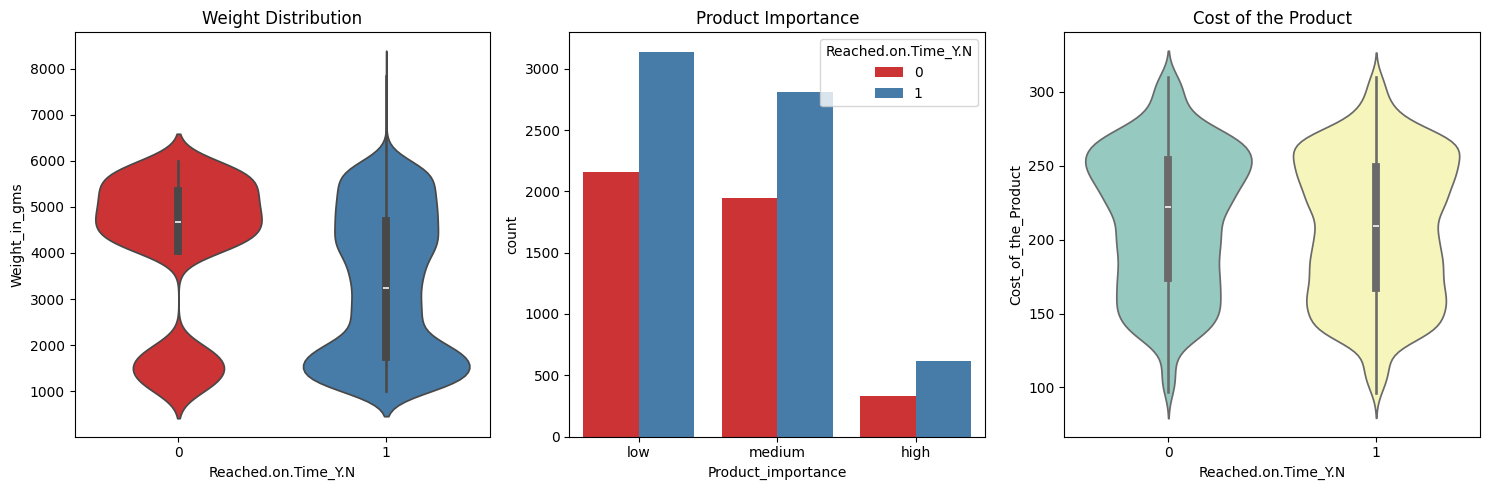

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y=df['Weight_in_gms'], x=df['Reached.on.Time_Y.N'], ax=ax[0], hue=df['Reached.on.Time_Y.N'], palette='Set1', legend=False).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Product Importance')
sns.violinplot(y=df['Cost_of_the_Product'], x=df['Reached.on.Time_Y.N'], ax=ax[2], hue=df['Reached.on.Time_Y.N'], palette='Set3', legend=False).set_title('Cost of the Product')

plt.tight_layout()
plt.show()

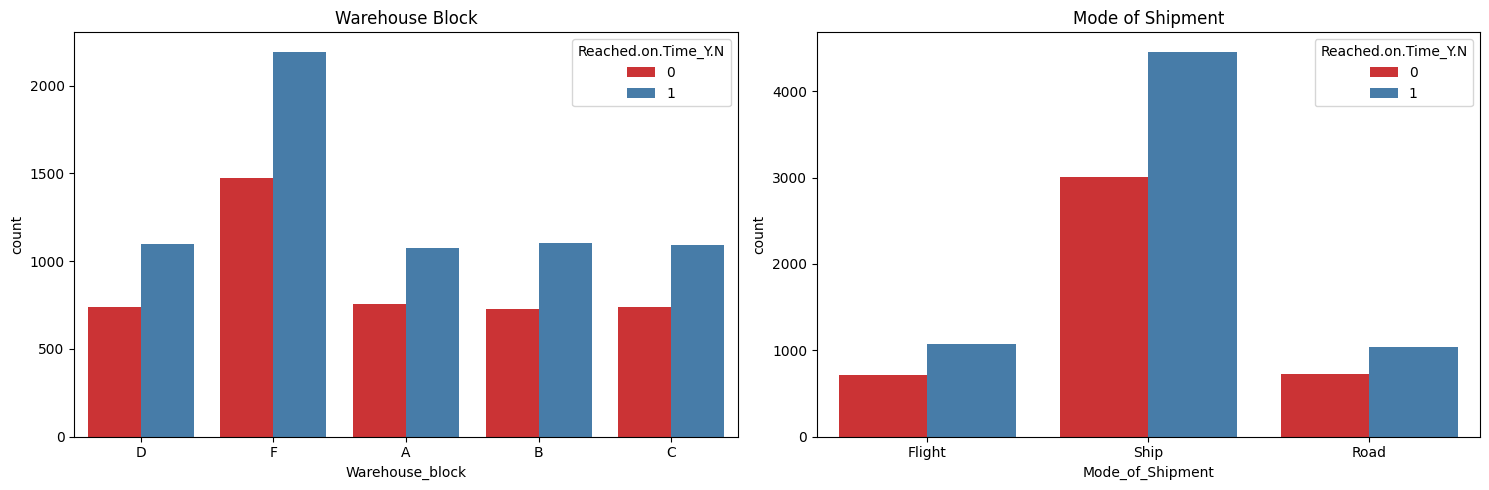

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Warehouse_block', data=df, ax=ax[0], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Mode of Shipment')

plt.tight_layout()
plt.show()

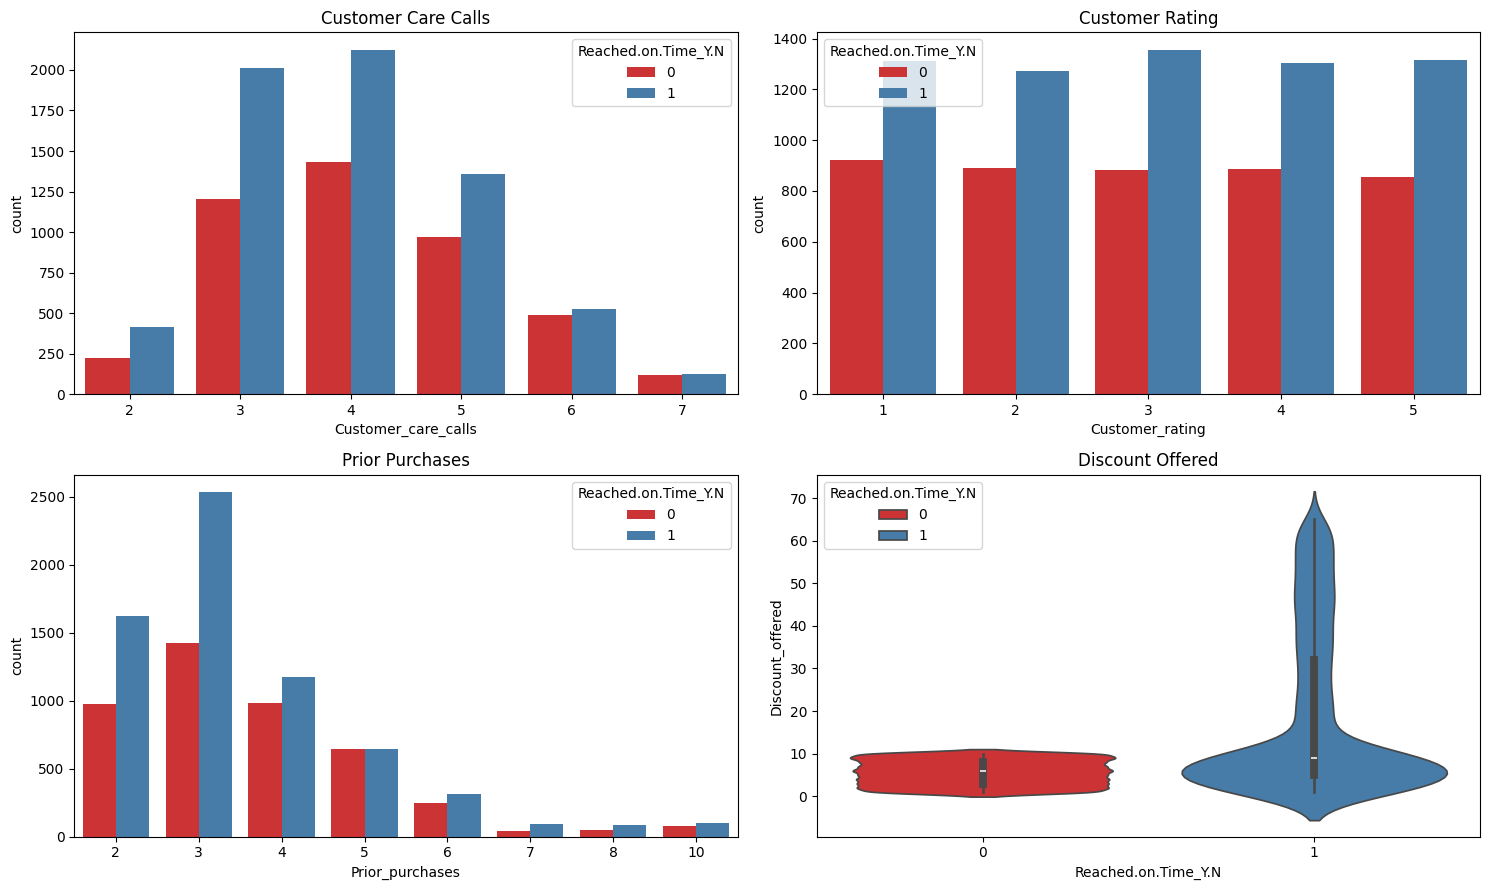

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))


sns.countplot(x='Customer_care_calls', data=df, ax=ax[0, 0], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Customer Care Calls')
sns.countplot(x='Customer_rating', data=df, ax=ax[0, 1], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Customer Rating')
sns.countplot(x='Prior_purchases', data=df, ax=ax[1, 0], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Prior Purchases')
sns.violinplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, ax=ax[1, 1], hue='Reached.on.Time_Y.N', palette='Set1').set_title('Discount Offered')

plt.tight_layout()
plt.show()

In [45]:


#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


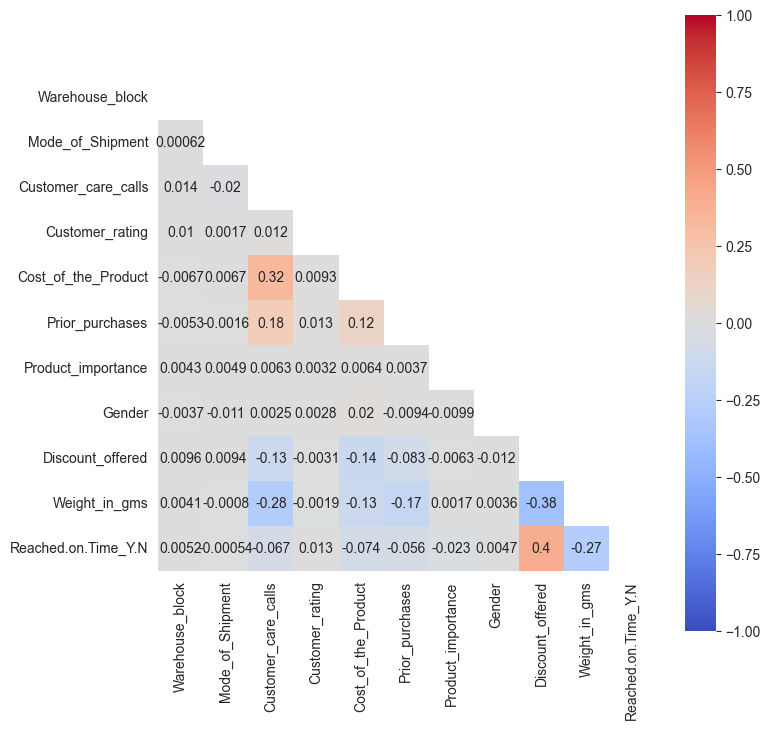

In [53]:
plt.figure(figsize=(8,8))
num_attribute = df.select_dtypes(exclude='object')
corr = num_attribute.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True,
                     cmap='coolwarm') 

    plt.show()

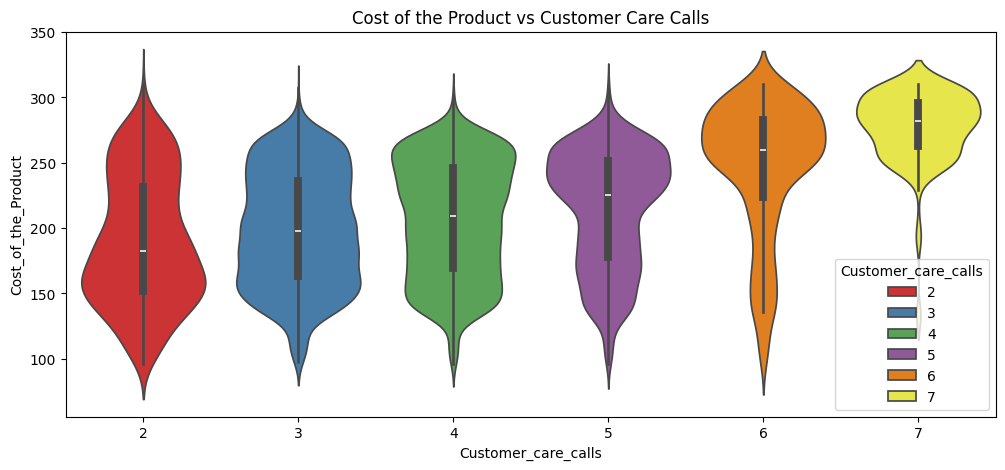

In [57]:

plt.figure(figsize=(12, 5))
sns.violinplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df, hue='Customer_care_calls', palette='Set1')
plt.title('Cost of the Product vs Customer Care Calls')
plt.show()

In [59]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

In [62]:
rfc = RandomForestClassifier()

In [66]:
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best parameters: ', grid.best_params_)


rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

rfc.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [67]:

print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [68]:

rfc_pred = rfc.predict(X_test)

In [70]:

dtc = DecisionTreeClassifier()

In [71]:
#Using GridSearchCV for hyperparameter tuning

#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [72]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [73]:
DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [74]:
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [75]:
dtc_pred = dtc.predict(X_test)

In [89]:

lr = LogisticRegression(max_iter=2000,solver='lbfgs')


In [90]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [91]:
lr.score(X_train, y_train)

0.6399590862598022

In [92]:
lr_pred = lr.predict(X_test)

In [94]:

knn = KNeighborsClassifier()

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
knn.score(X_train, y_train)

0.7782702579838618

In [97]:
knn_pred = knn.predict(X_test)

Text(0.5, 1.0, 'KNN Classifier')

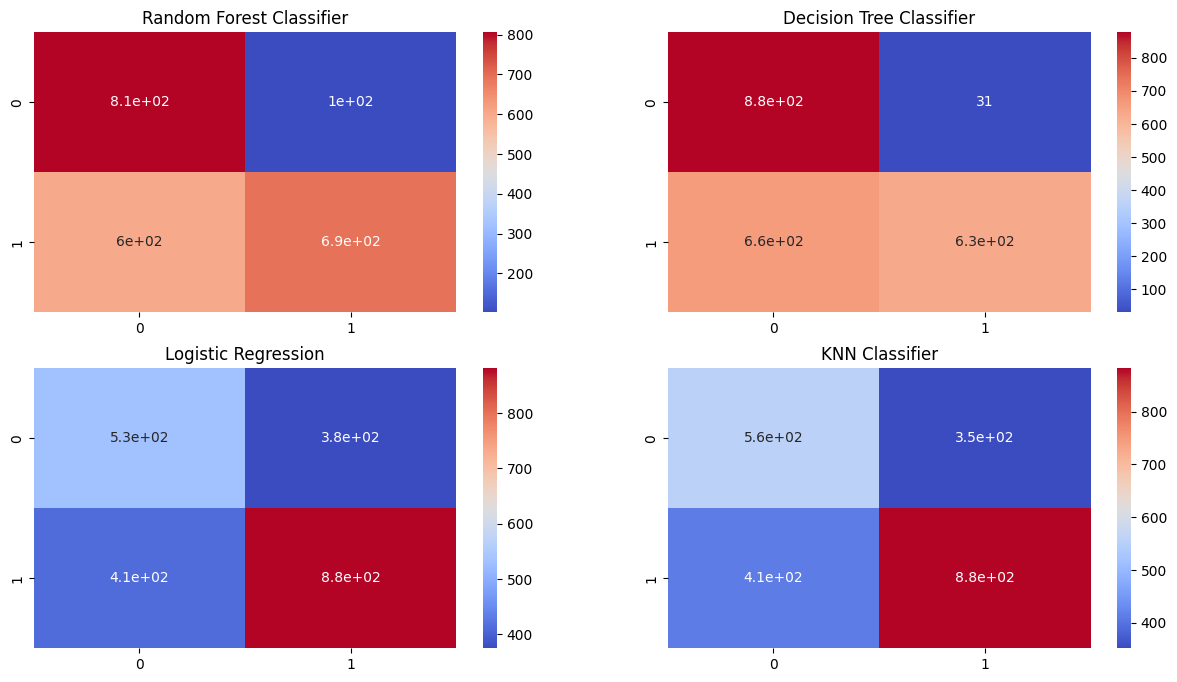

In [101]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [102]:
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.56      0.59      0.58       908
           1       0.70      0.68      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      

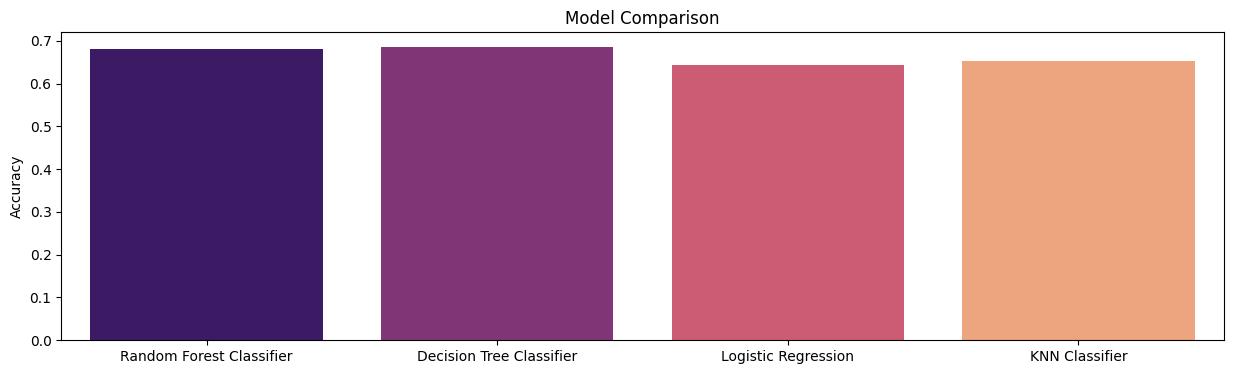

In [114]:
plt.figure(figsize=(15, 4))

models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), 
            accuracy_score(y_test, dtc_pred), 
            accuracy_score(y_test, lr_pred), 
            accuracy_score(y_test, knn_pred)]

sns.barplot(x=models, y=accuracy, hue=models, palette='magma', legend=False).set_title('Model Comparison')


plt.ylabel('Accuracy')

plt.show()